In [27]:
import math
import scipy
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../code/")
import thinkbayes
import thinkplot
    
    
class PaintBall(thinkbayes.Suite):
    def __init__(self,alphas,betas,locations):
        self.locations=locations
        pmf=thinkbayes.Pmf()
        pairs=[(alpha,beta) for alpha in alphas for beta in betas]
        for alpha,beta in pairs:
            prob=1/(max(betas)-beta+5)**2  # the prior
            pmf.Set((alpha,beta),prob)
        pmf.Normalize()
        thinkbayes.Suite.__init__(self,pmf)
    
    def Likelihood(self,data,hypo):
        alpha,beta=hypo
        x=data
        pmf=thinkbayes.Pmf()
        for loc in self.locations:
            theta=math.atan2(loc-alpha,beta)
            prob=(math.cos(theta)**2)/beta
            pmf.Set(loc,prob)
        pmf.Normalize()
        like=pmf.Prob(x)
        return like
    
    def MaxLikeInterval(self,percentage=50):
        interval=[]
        total=0.0
        t=[(v,p) for v,p in self.Items()]
        t=sorted(t,key=lambda x:x[1],reverse=True)
        for v,p in t:
            interval.append(v)
            total+=p
            if total>percentage/100:
                break
        return interval

Text(0, 0.5, 'alpha')

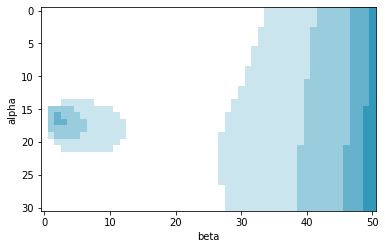

In [28]:
import numpy as np
import matplotlib.pyplot as plt

alphas=range(0,31)
betas=range(1,51)
locations=range(0,31)
suite=PaintBall(alphas,betas,locations)
suite.UpdateSet([15,16,18,21])

x=np.zeros((31,51))
for p in [25,50,75,90]:
    interval=suite.MaxLikeInterval(percentage=p)
    for i,j in interval:
        x[i][j]+=1
plt.imshow(x, cmap="ocean_r", vmin=0, vmax=15)
plt.xlabel("beta")
plt.ylabel("alpha")